# The Adapter DP & the Decorator DP #

### Richard Mather ###

### November, 2021 ###

## This unit introduces two 'Structural' Design Patterns ##

## There are two forms of Adapter, one with Class level scope (using multiple inheritance) and the other has Object level scope. We will be looking at  <font color="red">Adapter</font> and <font color="red">Decorator</font>, both of which have object-level scope ##

## Dusty Phillips (2015) explains the relationship between the two patterns as follows ... ##
### "*In structure, the Adapter pattern is similar to a simplified Decorator Pattern. Decorators typically provide the same interface they replace, whereas Adapters map between two different interfaces*". ###

## Interestingly, the GoF imply similarity between the two patterns as they both are also known as 'Wrappers'. Furthermore Python also has an inbuilt 'wrapping' decorator that is appropriately named '*@wrap*' (more on this later ... ) ##

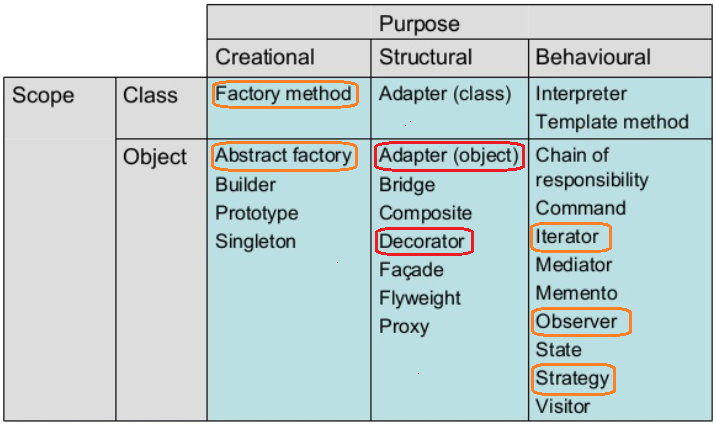

## We will also attempt some geospatial/map data processing using <font color="red">matplotlib projection </font> and <font color="red">cartopy geospatial </font>packages to visualise a geospatially registered image with different map projections

## At the end of this unit there are <font color="red">two logbook exercises for you to complete</font>  ##


## The Adapter Design Pattern ##
### An object structural pattern ###

### Intent: ### 
"Convert the interface of a class into another interface clients expect. Adapter lets classes work together that couldn't otherwise because of incompatible interfaces" (Gamma et al., 1995) 
- The GoF explain the ***motivation*** behind Adapter is that "Sometimes a toolkit class that's designed for reuse isn't [*in fact*] reusable only because its interface doesn't match the domain specific interface an application requires".
- The GoF present an example of a drawing editor package with an abstract class ***Shape*** that can draw itself and is extended by concrete classes for LineShape, CircleShape, PolygonShape etc. 
- However, extending the relatively simple drawing package to include the more sophisticated behaviour of a TextShape using a hypothetical pre-existing TextView class may be difficult because the interfaces of ***Shape*** and ***TextView*** are not compatible.
- Dusty Phillips (2015) expresses succinctly that 'adapters' "*allow two pre-existing objects to work together, even if their interfaces are not compatible. Like the display adapters that allow VGA projectors to be plugged into HDMI ports*".


### Structure ###

This is the generalised structure (for the object adapter only) as presented in Gamma et al. (1995)

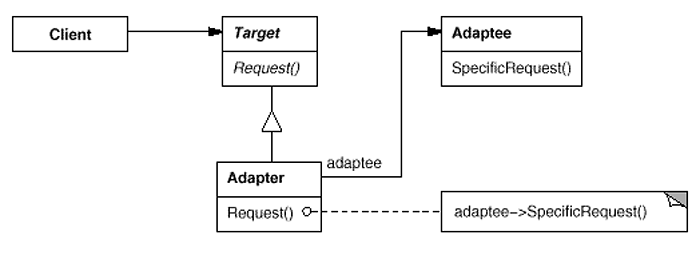

### Consequences ###

- A single ***Object Adapter*** can work with many 'adaptees' (i.e. all adaptee subclasses if there are any) 
- The Adapter can add functionality to all adaptees in one go


### Implementation ###

- Two worked examples are provided
 - The first extends Dusty Phillip's example with implementation and an interface to represent the GoF structure
 - The second extends Jungwoo Ryoo's example which also demonstrates the special polymorphic capability of Adapter because of its ability to resolve calls to methods with different names
 - The second example is also used as a template for a logbook exercise to demonstrate geospatial data-science capabilities of Python and associated packages
 
### Example 1 Notes ###

- This example has been extended to more closely represent the GoF 'object adapter' structure
- ... thereby other 'age calculators' and 'age calculator adaptors' (one could propose other expressions of age - in days, weeks, etc.) must realise the 'Target' interface (represented here by 'Interface_AgeCalculator')

### Example 2 Notes ###

- This example is an exceptionally 'adaptable' adaptor
- The Adaptor will take ***key(representing an object)-value(representing the object method) pairs*** to map any method name to a new 'request' method name (here represented by 'speak')
- In the example here it is then possible to iterate over the collection of objects and ***polymorphically*** call their 'speak' methods


In [1]:
# EXAMPLE 1 #

# Adapter DP example 'adapted' and extended with client, interface and implementation from Dusty Phillips (2015) pp331-333

import datetime

# Equivalent to the GoF 'Target' - All'Age' calculators are expected to implement 'get_age(...)' which 
class Interface_AgeCalculator:
    # Equivalent to the 'request()' in the GoF structure
    def get_age(self, date):
        pass
        # Exception raised if method not implemented by extending/realising classes
        raise NotImplementedError("Please implement get_age() for all subclasses/interface users!!!")

# Equivalent to the GoF 'Adaptee' 
# Pre-existing 'legacy' class/interface that works with dates as strings (not objects)
class Legacy_String_AgeCalculator:
    def __init__(self, birthday):
        # Takes a string from the DateAgeAdapteer object - check with print(birthday) -> "2005-10-20" - and splits at "-"
        self.year, self.month, self.day = (int(x) for x in birthday.split('-'))

    def calculate_age(self, date):
        year, month, day = (int(x) for x in date.split('-'))
        age = year - self.year
        if (month,day) < (self.month,self.day):
            age -= 1
            print("This is my age as a 'string' from the Legacy_String_AgeCalculator ... "+ str(age))
            return age

# Equivalent to the GoF 'Adapter' - this works with normal Python 'date' objects
# This: [1] takes a birthday 'date' object argument; [2] converts it to a string and passes it to the legacy class; 
# ... [3] obtains age as a string from the legacy class; [4] converts the age string and 
# ... returns a date object to the 'client'  
class DateAgeAdapter(Interface_AgeCalculator):
    
    def __init__(self, birthday):
        # Convert birthday into a string object (using _str_date) for the Old_AgeCalculator
        birthday = self._str_date(birthday)
        # Create an Legacy_String_AgeCalculator object and pass the birthday string to it
        self.calculator = Legacy_String_AgeCalculator(birthday)

    def _str_date(self, date):
        return date.strftime("%Y-%m-%d")

    def get_age(self, date):
        print("This is the current date and time from DateAgeAdapter ... "+dateTimeNow.strftime("%c"))
        date = self._str_date(date)
        return self.calculator.calculate_age(date)
        
# The GoF 'Client' class
class New_AgeCalculator(Interface_AgeCalculator):
    
    def __init__(self, birthday):
        self.birthday = birthday

    def get_age(self, date):
        # Create an adaptor object and pass birth date to it
        bday = DateAgeAdapter(self.birthday)
        # Pass the current date to the adapter get_age method
        return bday.get_age(date)

# Create a datetime object for birth date
myBirthday = datetime.datetime(2005, 10, 20)
# Create a datetime object for the current time
dateTimeNow = datetime.datetime.now()
# Initialise a New_AgeCalculator with a birth date and call new_get_age with a parameter for the curremt time 
myAgeNow = New_AgeCalculator(myBirthday).get_age(dateTimeNow)
print("This is my birthday as a 'string' from the datetime 'object' ... "+myBirthday.strftime("%c"))
print("This is my age as a 'string' from the New_AgeCalculator ... "+ str(myAgeNow))

This is the current date and time from DateAgeAdapter ... Tue Nov  2 13:30:44 2021
This is my birthday as a 'string' from the datetime 'object' ... Thu Oct 20 00:00:00 2005
This is my age as a 'string' from the New_AgeCalculator ... None


In [15]:
# EXAMPLE 2 #

# 'Adapted' and extended from Jungwoo Ryoo (2015) - note that all 'country' classes have different speak_xxx() methods 

# The GoF 'Adaptees'
class Korean: 
    def __init__(self):
        self.name = "Korean"
    def speak_korean(self):
        return "yeoboseyo!"

class British:
    def __init__(self):
        self.name = "British"    
    def say_english(self):
        return "hello!"

class German:
    def __init__(self):
        self.name = "German"
    def talk_a_little_german(self):
        return "guten tag!"

# The  GoF 'Adapter'
class Adapter:
    """This changes the generic method name to individualized method names"""

    # Here the ** operator allows a dictionary of key-value pairs to be passed and resolved in function calls
    def __init__(self, object, **adapted_method):
        """Change the name of the method"""
        self._object = object

        # Add a new dictionary item that establishes the mapping between the generic method name: speak() and the concrete method
        # For example, speak() will be translated to speak_korean() if the mapping says so
        self.__dict__.update(adapted_method)

    def __getattr__(self, attr):
        """Simply return the rest of attributes!"""
        return getattr(self._object, attr)
        
#List to store speaker objects
objects = []

#Create a Korean object
korean = Korean()

#Create a British object
british = British()

#Create a British object
german = German()

#Append the objects to the objects list - note the mapping of "speak()" to "speak_korean/english/german"
objects.append(Adapter(korean, speak=korean.speak_korean))
objects.append(Adapter(british, speak=british.say_english))
objects.append(Adapter(german, speak=german.talk_a_little_german))

for obj in objects:
    print("{} says ... '{}'".format(obj.name, obj.speak()))

Korean says ... 'yeoboseyo!'
British says ... 'hello!'
German says ... 'guten tag!'


## The Decorator Design Pattern ##
### An object structural pattern ###

### Intent: ### 
"Attach additional responsibilities to an object dynamically. Decorators provide a flexible alternative to subclassing for extending functionality" (Gamma et al., 1995) 
- The GoF explain the ***motivation*** behind Decorator is the need to add responsibilities to objects in place of static class inheritance which is not sufficiently flexible to vary behaviours dynamically.
- The GoF present an example of a TextView object that may be dynamically enhanced with a ScrollDecorator and/or a BorderDecorator when circumstances require these

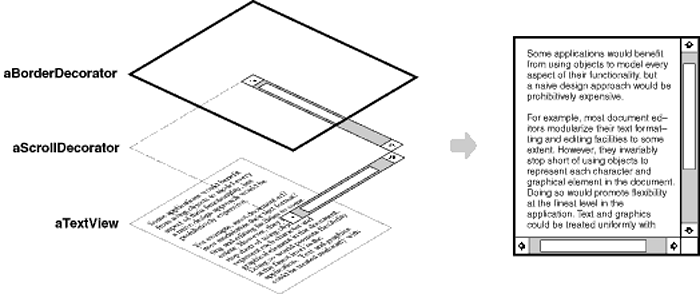

- Rather than using inheritance the GoF suggest that the "*... more flexible approach is to enclose the component in another object that adds the border* [or other behaviour]*. The enclosing object is call a* ***decorator***"
- Because the decorator exposes the same interface as the 'decoratee' it is transparent/invisible to the clients of the decoratee
- This transparency allows decorators to be nested recursively to add a unlimited number of responsibilities


### Structure ###

- Rather than the generalised view the Decorator structure is probably easiest understood by continuing the GoF example for decorating a TextView with borders and scroll bars - the UML diagram below is from Gamma and co-authors (1995)
- VisualComponent is an abstract class and defines the drawing and event handling interface for all visual objects
- The Decorator class simply forwards all draw() requests to its component (TextView) and the Decorator subclasses (ScrollDecorator and BorderDecorator) to extend the behaviour of Textview objects
- Note also that clients can't tell the difference between decorated and undecorated subjects - calls are treated polymorphically - and that decorators can be used anywhere a VisualComponent can

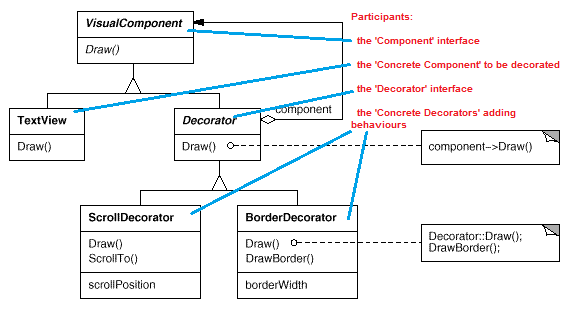


### Consequences ###

- Decorator is much more flexible for adding dynamic behaviour than static/multiple inheritance
- The GoF express that Decorator ... "*offers a pay-as-you-go approach to adding responsibilities ... instead of trying to support all forseeable features in a complex, customizable class, you can define a simple class and add functionality incrementally with Decorator objects*"


### Implementation ###

- Decorators (like Iterators) are embedded in many languages. Perhaps the most commonly used in Python are ***@classmethod, @staticmethod and @property*** ... also see the use of ***@wraps*** in Example [3]
- In common with all decorators they embellish existing methods with new or modified behaviour
- Examples [1] and [2] illustrate Python's built-in decorators
- Example [3] is a customised decorator

#### Example [1] below is derived from Michael Driscoll's (2017) online text book "Python 101" (https://python101.pythonlibrary.org/chapter25_decorators.html) ####

- The @classmethod and @staticmethod behave similarly.
- The @classmethod decorator "*can be called either on the class (such as C.f()) or on an instance (such as C().f()). The instance is ignored except for its class ... The primary use case of a @classmethod decorator that I have found in my research is as an alternate constructor or helper method for initialization*" (Driscoll, 2017).
- The @staticmethod decorator "*is just a function inside of a class. You can call it both with and without instantiating the class. A typical use case is when you have a function where you believe it has a connection with a class. It’s a stylistic choice for the most part*" (Driscoll, 2017).

#### Example [2] demonstrates the @property decorator and its associated @xxx.setter attribute and @xxx.deleter function ####

- ***@property*** turns a function into a 'getter' i.e. it behaves as a 'property' rather than a method
- ***@xxx.setter*** turns a function into a property setter - it may also execute other actions while doing so
- ***@xxx.deleter*** deletes the property/attribute referenced

#### Example [3] demonstrates a customised decorator and also uses Python's internal @wraps decorator ####
- This is a typically minimalistic pythonic and 'bare' function example extended from Jungwoo Ryoo (2015)
- The 'original' function returns a "Hello World" string 
- The decorator extends the original function by enclosing the string in (now obsolete) html '***blink***' tags
- It also demonstrates another decorator embedded in the Python language - ***@wraps***
- @wraps makes the original function name and docstring visible. 
 - Without @wraps only the name and docstring of the wrapper/decorating function would be visible 
 - You can confirm the behaviour of @wraps by commenting it out and re-running Example [3]
 - Output with @wraps ...
 ```
    <blink>Hello, World!</blink>
    The function name is ... hello_world
    The docstring for the function is ... This is the original function!
 ```
 - Output without @wraps ...
 ```
    <blink>Hello, World!</blink>
    The function name is ... decorator
    The docstring for the function is ... This is the decorator method!
```

In [9]:
# EXAMPLE 1 - THE BUILT IN @classmethod AND @staticmethod DECORATORS

class DecoratorTest(object):

    def __init__(self):
        pass

    def doubler(self, x):
        print("running doubler: %s" % self )
        return x*2

    @classmethod
    def class_tripler(self, x):
        print("running tripler: %s" % self)
        return x*3

    @staticmethod
    def static_quad(x):
        print("running quad")
        return x*4

if __name__ == "__main__":
    # Create a DecoratorTest object
    decor = DecoratorTest()
    
    # Use the DecoratorTest object conventionally to call double and tripler methods 
    print(decor.doubler(5))
    print(decor.class_tripler(3))
    
    # Both @classmethod and @staticmethod decorators allow methods to be called with and 
    # ... without (as below) instantiating the class
    print(DecoratorTest.class_tripler(3))
    print(DecoratorTest.static_quad(2))
    print(decor.static_quad(3))

    # Inspecting the methods confirm their status as an object-method, a class method and a static 'function'
    print(decor.doubler)
    print(decor.class_tripler)
    print(decor.static_quad)

running doubler: <__main__.DecoratorTest object at 0x000002DCB478CA60>
10
running tripler: <class '__main__.DecoratorTest'>
9
running tripler: <class '__main__.DecoratorTest'>
9
running quad
8
running quad
12
<bound method DecoratorTest.doubler of <__main__.DecoratorTest object at 0x000002DCB478CA60>>
<bound method DecoratorTest.class_tripler of <class '__main__.DecoratorTest'>>
<function DecoratorTest.static_quad at 0x000002DCB48298B0>


In [16]:
# EXAMPLE 2 - THE BUILT IN @property (GETTER) DECORATOR AND ITS ASSOCIATED @xxx.setter AND @xxx.deleter FUNCTIONS

import sys

class FastCar:

    def __init__(self, price):
        self._price = price
    
    # Decorates the price() method as a getter so it behaves as a public property
    @property
    def price(self):
        return self._price
    
    # Decorate the same price method as a setter function
    @price.setter
    def price(self, new_price):
            self._price = new_price + 9999

    # Decorate the same price method as a deleter function
    @price.deleter
    def price(self):
        del self._price
        

# Create a Fast Car object
fc = FastCar(100000)
print("FC price is ... £%s " % format(fc.price, ','))


# Use the 'setter' to change the price
fc.price=200000
print("FC price is now ... £%s " % format(fc.price, ','))

# Use the 'deleter' to remove fc.price
del fc.price
# Check to see if fc.price has been deleted
try:
    print(fc.price)
except Exception as e:
    print(e)
    print(sys.exc_info())
    
# Reinstate fc.price and call to check that this is the original 'price' with a setter that adds £9999
fc.price=300000
print("FC price is now ... £%s " % format(fc.price, ','))

# However, remember it is possible in Python to dynamically assign properties ...
fc.silly_price=100000000000000
print("FC silly price is ... £%s " % format(fc.silly_price, ','))


FC price is ... £100,000 
FC price is now ... £209,999 
'FastCar' object has no attribute '_price'
(<class 'AttributeError'>, AttributeError("'FastCar' object has no attribute '_price'"), <traceback object at 0x000002DCB482E100>)
FC price is now ... £309,999 
FC silly price is ... £100,000,000,000,000 


In [18]:
# EXAMPLE [3] A CUSTOMISED DECORATOR THAT ALSO MAKES USE OF THE BUILT-IN PYTHON @wraps DECORATOR

from functools import wraps

def make_blink(function):
    """Defines the decorator"""

    #This makes the decorator transparent in terms of its name and docstring
    @wraps(function)

    #Define the inner function
    def decorator():
        """This is the decorator method! """
        #Grab the return value of the function being decorated
        ret = function() 

        #Add new functionality to the function being decorated
        return "<blink>" + ret + "</blink>"

    return decorator

#Apply the decorator here!
@make_blink
def hello_world():
    """This is the original function! """

    return "Hello, World!"

#Check the result of decorating
print(hello_world())

#Check if the function name is still the same name of the function being decorated
print("The function name is ... "+hello_world.__name__)

#Check if the docstring is still the same as that of the function being decorated
print("The docstring for the function is ... "+hello_world.__doc__)

<blink>Hello, World!</blink>
The function name is ... hello_world
The docstring for the function is ... This is the original function! 


## <font color="red">Logbook Exercise 12 - The Adapter DP</font> ##

- Modify Jungwoo Ryoo's Adapter Pattern example (the one with 'country' classes that 'speak' greetings) to showcase:
 - the ***polymorphic*** capability of the Adpater DP 
 - the geo-data capabilities of ***matplotlib geographical projections*** ...
 - in combination with ***Cartopy geospatial data processing*** package to ***produce maps and other geospatial data analyses***.
- A frequent problem in handling geospatial data is that the user often needs to convert it from one form of map projection (essentially a formula to convert the globe into a plane for map-representation) to another map projection

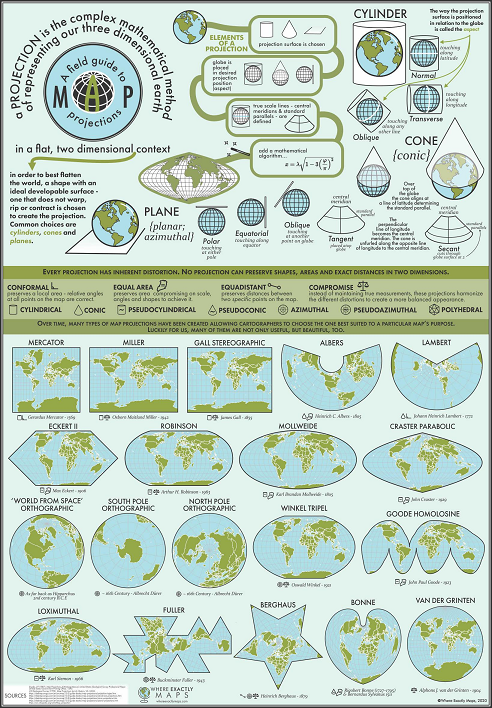

- Fortunately other clever people have written the algorithms we need
- Less fortunately, the interfaces of all the classes that return projections are different

##  Development Stages ##
- We need ...
 - first, to install the Python cartographic ***Cartopy*** package. In Anaconda launch a CMD.exe terminal and enter the following ...
 ```
     conda install -c conda-forge cartopy
 ```
 - to insert a code cell below this one ... and copy the extended example of Ryoo's Adapter above (with 'speak' methods in Korean, British and German) in this ...
 - an ***Adapter*** - Ryoo's adapter is already a well-engineered solution that requires no modification
 - then to import some essential packages 
 ```
     import cartopy.crs as ccrs
     import matplotlib.pyplot as plt
 ```
 - then add the 'adaptee' classes - here represented by the plot axes and their map projections
 ```
    class PlateCarree: 
        def __init__(self):
            self.name = "PlateCarree"
        def project_PlateCarree(self):
            ax = plt.axes(projection=ccrs.PlateCarree())
            return ax
    
    class InterruptedGoodeHomolosine:
        def __init__(self):
            self.name = "InterruptedGoodeHomolosine"    
        def project_InterruptedGoodeHomolosine(self):
            ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
            return ax

    class AlbersEqualArea:
        def __init__(self):
            self.name = "AlbersEqualArea"    
        def project_AlbersEqualArea(self):
            ax = plt.axes(projection=ccrs.AlbersEqualArea())
            return ax   

    class Mollweide:
        def __init__(self):
            self.name = "Mollweide"    
        def project_Mollweide(self):
            ax = plt.axes(projection=ccrs.Mollweide())
            return ax
 ```
 - similarly to Ryoo's example you will need a collection to store projection objects
 - again, simlarly to Ryoo, to create all the projection objects (e.g. ```plateCarree =PlateCarree()``` )
 - again, similarly to Ryoo, to append to the collection key-value pairs for each projection and its projection method
 - finally to traverse the list of objects to:
 
 ```
    # Create an axes with the specified projection  
    ax = obj.project()
    # Attach Cartopy's default geospatially registered map/image of the world 
    ax.stock_img()
    # Add the coastlines - highlight these with a black vector 
    ax.coastlines()
    # Print the name of the object/projection
    print(obj.name)
    # Plot the axes, projection and render the map-image to the projection
    plt.show()

 ```
 - The output should look something like this ...
 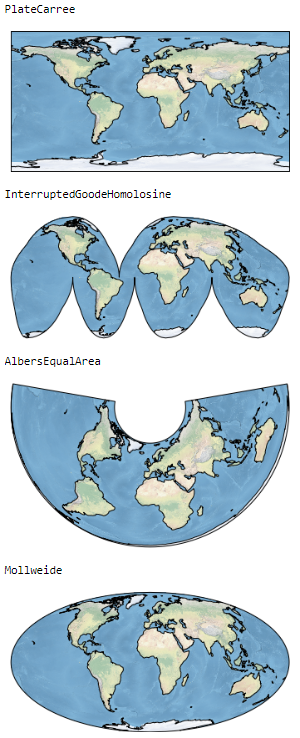
 

PlateCarree


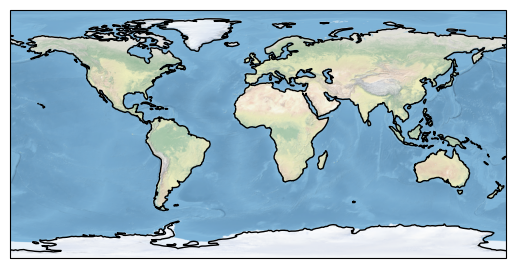

InterruptedGoodeHomolosine


c:\Users\reazs\anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
c:\Users\reazs\anaconda3\lib\site-packages\cartopy\crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
c:\Users\reazs\anaconda3\lib\site-packages\cartopy\crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


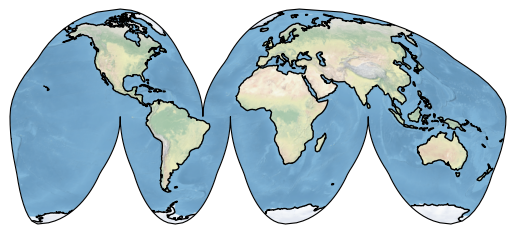

AlbersEqualArea


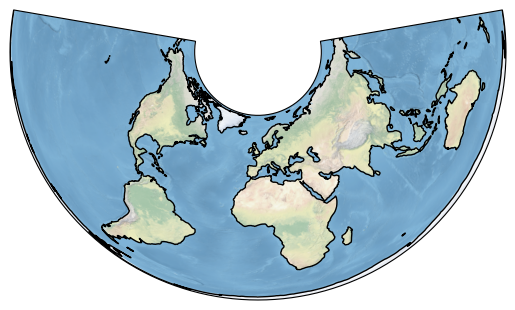

In [16]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

class PlateCarree: 
    def __init__(self):
        self.name = "PlateCarree"
    def project_PlateCarree(self):
        ax = plt.axes(projection=ccrs.PlateCarree())
        return ax
    
class InterruptedGoodeHomolosine:
    def __init__(self):
        self.name = "InterruptedGoodeHomolosine"    
    def project_InterruptedGoodeHomolosine(self):
        ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
        return ax

class AlbersEqualArea:
    def __init__(self):
        self.name = "AlbersEqualArea"    
    def project_AlbersEqualArea(self):
        ax = plt.axes(projection=ccrs.AlbersEqualArea())
        return ax   

class Mollweide:
    def __init__(self):
        self.name = "Mollweide"    
    def project_Mollweide(self):
        ax = plt.axes(projection=ccrs.Mollweide())
        return ax

class Adapter:
    def __init__(self, object, **adapted_method):
        self._object = object

        self.__dict__.update(adapted_method)

    def __getattr__(self, attr):
        return getattr(self._object, attr)

maps = []

plateCarree = PlateCarree()

interruptedGoodeHomolosine = InterruptedGoodeHomolosine()

albersEqualArea = AlbersEqualArea()

objects.append(Adapter(plateCarree, project = plateCarree.project_PlateCarree))
objects.append(Adapter(interruptedGoodeHomolosine, project = interruptedGoodeHomolosine.project_InterruptedGoodeHomolosine))
objects.append(Adapter(albersEqualArea, project = albersEqualArea.project_AlbersEqualArea))

    # Create an axes with the specified projection  


for obj in objects:
    ax = obj.project()
    #ax = plateCarree.project_PlateCarree()
    # Attach Cartopy's default geospatially registered map/image of the world 
    ax.stock_img()
    # Add the coastlines - highlight these with a black vector 
    ax.coastlines()
    # Print the name of the object/projection
    print(obj.name)
    # Plot the axes, projection and render the map-image to the projection
    plt.show()

## <font color="red">Logbook Exercise 13 - The Decorator DP</font> ##

- Repair the code below so that the decorator reveals the name and docstring of aTestMethod()
- Note ... the @wrap decorator is NOT needed here

```
    <<< Name of the 'decorated' function ...  aTestMethod  >>> 
    <<< Docstring for the 'decorated' function is ...  This is a method to test the docStringDecorator  >>>
    What is your name? ... Buggy Code
    Hello ... Buggy Code
```

In [2]:
# REPAIR THE DECORATOR DP BELOW ...

from typing import Self

@docStringDecorator
def docStringDecorator(f):
    '''Decorator that automatically reports name and docstring for a decorated function'''
    print("<<< Name of the 'decorated' function ... ",self.__name__," >>> ")
    print("<<< Docstring for the 'decorated' function is ... ",self.__doc__," >>>")


def aTestMethod():
    '''This is a method to test the docStringDecorator'''
    nm = input("What is your name? ... ")
    msg = "Hello ... " + nm
    return msg

print(aTestMethod())

ImportError: cannot import name 'Self' from 'typing' (c:\Users\reazs\AppData\Local\Programs\Python\Python39\lib\typing.py)

###### References & Learning Resources#

- Cartopy (undated) Cartopy Projection list (https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)
- Driscoll, M. (2017) "Python 101" (https://python101.pythonlibrary.org/chapter25_decorators.html)
- Gamma, E., Helm, R., Johnson, R., & Vlissides, J. (1995). Gamma, E., Helm, R., Johnson, R., & Vlissides, J. Mar. 1995. Design Patterns–Elements of Reusable Object-Oriented Software. Addison-Wesley.
- Jungwoo Ryoo (2015) Python: Design Patterns. Available at: https://www.linkedin.com/learning/python-design-patterns and https://www.lynda.com/Python-tutorials/Design-Patterns-Python/369187-2.html
- Matplotlib (undated) Geographic Projections. (https://matplotlib.org/3.2.1/gallery/subplots_axes_and_figures/geo_demo.html)
- Phillips D. (2015) Python 3 Object-oriented Programming - Second Edition. PACKT Publishing.
- Shalloway, A., & Trott, J. R. (2002). Design patterns explained: A new perspective on object-oriented design. Addison-Wesley
- Matplotlib Geographical Projections https://matplotlib.org/gallery/subplots_axes_and_figures/geo_demo.html#sphx-glr-gallery-subplots-axes-and-figures-geo-demo-py